### Import packages

In [1]:
import itertools
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from utilities import cal_score, convert_types

### Columns

In [2]:
cols_num = ['txn_dt', 'total_floor', 'building_complete_dt', 'parking_area', 'parking_price', 'txn_floor', 'land_area', 'building_area', 'lat', 'lon', 'village_income_median', 'town_population', 'town_area', 'town_population_density', 'doc_rate', 'master_rate', 'bachelor_rate', 'jobschool_rate', 'highschool_rate', 'junior_rate', 'elementary_rate', 'born_rate', 'death_rate', 'marriage_rate', 'divorce_rate', 'N_50', 'N_500', 'N_1000', 'N_5000', 'N_10000', 'I_10', 'I_50', 'I_100', 'I_250', 'I_500', 'I_1000', 'I_5000', 'I_10000', 'I_MIN', 'II_10', 'II_50', 'II_100', 'II_250', 'II_500', 'II_1000', 'II_5000', 'II_10000', 'II_MIN', 'III_10', 'III_50', 'III_100', 'III_250', 'III_500', 'III_1000', 'III_5000', 'III_10000', 'III_MIN', 'IV_10', 'IV_50', 'IV_100', 'IV_250', 'IV_500', 'IV_1000', 'IV_5000', 'IV_10000', 'IV_MIN', 'V_10', 'V_50', 'V_100', 'V_250', 'V_500', 'V_1000', 'V_5000', 'V_10000', 'V_MIN', 'VI_50', 'VI_100', 'VI_250', 'VI_500', 'VI_1000', 'VI_5000', 'VI_10000', 'VI_MIN', 'VII_10', 'VII_50', 'VII_100', 'VII_250', 'VII_500', 'VII_1000', 'VII_5000', 'VII_10000', 'VII_MIN', 'VIII_10', 'VIII_50', 'VIII_100', 'VIII_250', 'VIII_500', 'VIII_1000', 'VIII_5000', 'VIII_10000', 'VIII_MIN', 'IX_10', 'IX_50', 'IX_100', 'IX_250', 'IX_500', 'IX_1000', 'IX_5000', 'IX_10000', 'IX_MIN', 'X_10', 'X_50', 'X_100', 'X_250', 'X_500', 'X_1000', 'X_5000', 'X_10000', 'X_MIN', 'XI_10', 'XI_50', 'XI_100', 'XI_250', 'XI_500', 'XI_1000', 'XI_5000', 'XI_10000', 'XI_MIN', 'XII_10', 'XII_50', 'XII_100', 'XII_250', 'XII_500', 'XII_1000', 'XII_5000', 'XII_10000', 'XII_MIN', 'XIII_10', 'XIII_50', 'XIII_100', 'XIII_250', 'XIII_500', 'XIII_1000', 'XIII_5000', 'XIII_10000', 'XIII_MIN', 'XIV_10', 'XIV_50', 'XIV_100', 'XIV_250', 'XIV_500', 'XIV_1000', 'XIV_5000', 'XIV_10000', 'XIV_MIN']
cols_cat = ['building_material', 'city', 'building_type', 'building_use', 'parking_way', 'town', 'village']
cols_bin = ['I_index_50', 'I_index_500', 'I_index_1000', 'II_index_50', 'II_index_500', 'II_index_1000', 'III_index_50', 'III_index_500', 'III_index_1000', 'IV_index_50', 'IV_index_500', 'IV_index_1000', 'IV_index_5000', 'V_index_50', 'V_index_500', 'V_index_1000', 'VI_10', 'VI_index_50', 'VI_index_500', 'VI_index_1000', 'VII_index_50', 'VII_index_500', 'VII_index_1000', 'VIII_index_50', 'VIII_index_500', 'VIII_index_1000', 'IX_index_50', 'IX_index_500', 'IX_index_1000', 'IX_index_5000', 'X_index_50', 'X_index_500', 'X_index_1000', 'XI_index_50', 'XI_index_500', 'XI_index_1000', 'XI_index_5000', 'XI_index_10000', 'XII_index_50', 'XII_index_500', 'XII_index_1000', 'XIII_index_50', 'XIII_index_500', 'XIII_index_1000', 'XIII_index_5000', 'XIII_index_10000', 'XIV_index_50', 'XIV_index_500', 'XIV_index_1000']
cols_feats = cols_num + cols_cat + cols_bin

col_target = 'total_price'
col_target_log1p = 'target'

#### Remove columns

In [3]:
feat_rm = ['XIII_index_500', 'VI_500', 'IX_index_50', 'I_50', 'III_index_50', 'XIV_100', 'X_50', 'VI_index_500', 'VIII_index_50', 'XI_index_1000', 'XIII_250', 'N_500', 'XIII_index_50', 'I_index_1000', 'I_10', 'IV_index_1000', 'VIII_index_1000', 'IX_index_1000', 'I_index_50', 'XIII_10', 'X_index_50', 'IX_50', 'VI_10']
print('N of features removed', len(feat_rm))
cols_num = [c for c in cols_num if c not in feat_rm]
cols_cat = [c for c in cols_cat if c not in feat_rm]
cols_bin = [c for c in cols_bin if c not in feat_rm]
cols_feats = cols_num + cols_cat + cols_bin
print('N remaining features:', len(cols_feats))

N of features removed 23
N remaining features: 188


### Read data

In [4]:
df = pd.read_csv('dataset/train.csv', dtype=object)

In [5]:
df.columns

Index(['building_id', 'building_material', 'city', 'txn_dt', 'total_floor',
       'building_type', 'building_use', 'building_complete_dt', 'parking_way',
       'parking_area',
       ...
       'XIV_500', 'XIV_index_500', 'XIV_1000', 'XIV_index_1000', 'XIV_5000',
       'XIV_index_5000', 'XIV_10000', 'XIV_index_10000', 'XIV_MIN',
       'total_price'],
      dtype='object', length=235)

### Preprocessing

In [6]:
# Convert types
df = convert_types(df, cols_num, col_target=col_target)

# Generate feats (train-test-same feats)
#create_feats(df)

### Target transform

In [7]:
def target_transform(df):  # Add new columns inplace!!
    '''Transform the original target to the target for model to train on'''
    df['log_total_price'] = np.log1p(df['total_price'])
    return df

def target_inverse_transform(df, y_pred):
    '''Inverse transorform the model target to the original target of our problem'''
    y_pred_expm1 = np.expm1(y_pred)
    y_pred_final = np.clip(y_pred_expm1, 0, None)
    return y_pred_final            

In [8]:
df = target_transform(df)

In [9]:
# transformed target fit by the model
col_model_target = 'log_total_price'
#col_model_target = 'total_price'

### Feat engineering

In [10]:
from feature_engineering import CategoricalColumnsEncoder

In [11]:
class FeatureEngineering():
    def __init__(self):
        pass
    
    def fit_transform(self, df, cols_cat, cols_bin):
        df = df.copy()
        # Denote categorical-type
        self.cat_encoder = CategoricalColumnsEncoder(mode='pandas')
        self.cat_encoder.fit_transform(df, cols_cat+cols_bin)
        return df
    
    def transform(self, df):
        df = df.copy()
        self.cat_encoder.transform(df)
        return df

### Grid search

In [12]:
# grid search
params_fix = {'task': 'train',
              'boosting_type': 'gbdt',
              'objective': 'mse',
              'metric': 'mape',
              'learning_rate': 0.015,
              }
lgb_other_params = {'num_boost_round': 10000,
                    'verbose_eval': 2000,
                    'early_stopping_rounds': 1000,
                   }

#### Round 1

In [13]:
%%time
params_gsearch1 = {'num_leaves': [63, 255, 511],           # may reduce in dim-reduction exp
                   'feature_fraction': [0.5, 0.75, 1.0],
                   'min_data_in_leaf': [5, 20, 50]
                   }

gsearch = {}
folds = KFold(n_splits=3, shuffle=True, random_state=123)
for i_fold, (itrain, ival) in enumerate(folds.split(df)): # kfold
    print('==== Fold', i_fold+1, '====')
    
    # split train, val
    df_train = df.loc[itrain]
    df_val = df.loc[ival]
    
    # feat eng
    feat_eng = FeatureEngineering()
    df_train = feat_eng.fit_transform(df_train, cols_cat, cols_bin)
    df_val = feat_eng.transform(df_val)

    # Construct lgb dataset
    lgb_train = lgb.Dataset(df_train[cols_feats], df_train[col_model_target]).construct()
    lgb_val = lgb.Dataset(df_val[cols_feats], df_val[col_model_target], reference=lgb_train).construct()
        
    # grid search
    for values in itertools.product(*[params_gsearch1[key] for key in params_gsearch1]):
        params = params_fix.copy()
        params.update( dict(zip(params_gsearch1.keys(), values)) )
        print('params:', params)

        model = lgb.train(params, lgb_train, valid_sets=lgb_val, **lgb_other_params)

        y_pred = model.predict(df_val[cols_feats])
        
        y_pred_final = target_inverse_transform(df_val, y_pred)
            
        score = cal_score(df_val['total_price'], y_pred_final)
        print(score)
        tuple_params = tuple(params.items())
        gsearch[tuple_params] = gsearch.get(tuple_params, []) + [score]

# aggregate, sort gsearch results
gsearch_results1 = [[key, np.mean(val), val] for key, val in gsearch.items()]
gsearch_results1.sort(key= lambda x: x[1], reverse=True)

==== Fold 1 ====
params: {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'mse', 'metric': 'mape', 'learning_rate': 0.015, 'num_leaves': 63, 'feature_fraction': 0.5, 'min_data_in_leaf': 5}
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00923317
[4000]	valid_0's mape: 0.00887656
[6000]	valid_0's mape: 0.00872198
[8000]	valid_0's mape: 0.00863624
[10000]	valid_0's mape: 0.00858701
Did not meet early stopping. Best iteration is:
[10000]	valid_0's mape: 0.00858701
5417.862679203314
params: {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'mse', 'metric': 'mape', 'learning_rate': 0.015, 'num_leaves': 63, 'feature_fraction': 0.5, 'min_data_in_leaf': 20}
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00918908
[4000]	valid_0's mape: 0.00882793
[6000]	valid_0's mape: 0.00867955
[8000]	valid_0's mape: 0.0086034
[10000]	valid_0's mape: 0.00855998
Did not meet early stopping. Best iteration is:
[9996]

5434.858838546298
params: {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'mse', 'metric': 'mape', 'learning_rate': 0.015, 'num_leaves': 255, 'feature_fraction': 1.0, 'min_data_in_leaf': 20}
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00895729
[4000]	valid_0's mape: 0.0088604
[6000]	valid_0's mape: 0.00883831
[8000]	valid_0's mape: 0.00883125
[10000]	valid_0's mape: 0.00882813
Did not meet early stopping. Best iteration is:
[10000]	valid_0's mape: 0.00882813
5428.858421012194
params: {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'mse', 'metric': 'mape', 'learning_rate': 0.015, 'num_leaves': 255, 'feature_fraction': 1.0, 'min_data_in_leaf': 50}
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.0089868
[4000]	valid_0's mape: 0.00890181
[6000]	valid_0's mape: 0.00888498
[8000]	valid_0's mape: 0.00888038
Early stopping, best iteration is:
[8402]	valid_0's mape: 0.00888008
5378.857433173229

[2000]	valid_0's mape: 0.00933513
[4000]	valid_0's mape: 0.00901403
[6000]	valid_0's mape: 0.00887914
[8000]	valid_0's mape: 0.00881276
[10000]	valid_0's mape: 0.0087753
Did not meet early stopping. Best iteration is:
[9995]	valid_0's mape: 0.00877525
5404.861251093201
params: {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'mse', 'metric': 'mape', 'learning_rate': 0.015, 'num_leaves': 63, 'feature_fraction': 1.0, 'min_data_in_leaf': 5}
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00949913
[4000]	valid_0's mape: 0.00916508
[6000]	valid_0's mape: 0.00902244
[8000]	valid_0's mape: 0.00895373
[10000]	valid_0's mape: 0.00891119
Did not meet early stopping. Best iteration is:
[10000]	valid_0's mape: 0.00891119
5342.859654892749
params: {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'mse', 'metric': 'mape', 'learning_rate': 0.015, 'num_leaves': 63, 'feature_fraction': 1.0, 'min_data_in_leaf': 20}
Training until validation scores do

[2000]	valid_0's mape: 0.00881537
[4000]	valid_0's mape: 0.00878051
[6000]	valid_0's mape: 0.00877443
[8000]	valid_0's mape: 0.00877294
[10000]	valid_0's mape: 0.00877253
Did not meet early stopping. Best iteration is:
[10000]	valid_0's mape: 0.00877253
5434.861687343586
params: {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'mse', 'metric': 'mape', 'learning_rate': 0.015, 'num_leaves': 511, 'feature_fraction': 0.75, 'min_data_in_leaf': 20}
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00878187
[4000]	valid_0's mape: 0.0087521
[6000]	valid_0's mape: 0.00874781
[8000]	valid_0's mape: 0.00874611
[10000]	valid_0's mape: 0.0087454
Did not meet early stopping. Best iteration is:
[9999]	valid_0's mape: 0.0087454
5444.861961536245
params: {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'mse', 'metric': 'mape', 'learning_rate': 0.015, 'num_leaves': 511, 'feature_fraction': 0.75, 'min_data_in_leaf': 50}
Training until validation scores

[2000]	valid_0's mape: 0.00874418
[4000]	valid_0's mape: 0.00863072
[6000]	valid_0's mape: 0.00860171
[8000]	valid_0's mape: 0.00859097
[10000]	valid_0's mape: 0.00858658
Did not meet early stopping. Best iteration is:
[10000]	valid_0's mape: 0.00858658
5522.86090338145
params: {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'mse', 'metric': 'mape', 'learning_rate': 0.015, 'num_leaves': 255, 'feature_fraction': 0.5, 'min_data_in_leaf': 50}
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.0087413
[4000]	valid_0's mape: 0.00863032
[6000]	valid_0's mape: 0.00860689
[8000]	valid_0's mape: 0.00860115
[10000]	valid_0's mape: 0.00859971
Did not meet early stopping. Best iteration is:
[9990]	valid_0's mape: 0.0085997
5500.860742213327
params: {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'mse', 'metric': 'mape', 'learning_rate': 0.015, 'num_leaves': 255, 'feature_fraction': 0.75, 'min_data_in_leaf': 5}
Training until validation scores d

5344.854078601243
Wall time: 13h 54min 35s


In [14]:
display(gsearch_results1)

[[(('task', 'train'),
   ('boosting_type', 'gbdt'),
   ('objective', 'mse'),
   ('metric', 'mape'),
   ('learning_rate', 0.015),
   ('num_leaves', 255),
   ('feature_fraction', 0.5),
   ('min_data_in_leaf', 20)),
  5512.863518319453,
  [5514.86459943968, 5500.865052137229, 5522.86090338145]],
 [(('task', 'train'),
   ('boosting_type', 'gbdt'),
   ('objective', 'mse'),
   ('metric', 'mape'),
   ('learning_rate', 0.015),
   ('num_leaves', 255),
   ('feature_fraction', 0.5),
   ('min_data_in_leaf', 5)),
  5510.53040089369,
  [5531.864638843716, 5494.864978972886, 5504.861584864465]],
 [(('task', 'train'),
   ('boosting_type', 'gbdt'),
   ('objective', 'mse'),
   ('metric', 'mape'),
   ('learning_rate', 0.015),
   ('num_leaves', 255),
   ('feature_fraction', 0.5),
   ('min_data_in_leaf', 50)),
  5507.529995110511,
  [5524.864593644789, 5496.864649473416, 5500.860742213327]],
 [(('task', 'train'),
   ('boosting_type', 'gbdt'),
   ('objective', 'mse'),
   ('metric', 'mape'),
   ('learning_ra

#### Round 2

In [15]:
%%time
params_gsearch2 = {'lambda_l1': [0, 0.01, 0.1],
                   'lambda_l2': [0, 0.01, 0.1]
                  }

gsearch = {}
folds = KFold(n_splits=3, shuffle=True, random_state=123)
for i_fold, (itrain, ival) in enumerate(folds.split(df)): # kfold
    print('==== Fold', i_fold+1, '====')
    
    # split train, val
    df_train = df.loc[itrain]
    df_val = df.loc[ival]
    
    # feat eng
    feat_eng = FeatureEngineering()
    df_train = feat_eng.fit_transform(df_train, cols_cat, cols_bin)
    df_val = feat_eng.transform(df_val)

    # Construct lgb dataset
    lgb_train = lgb.Dataset(df_train[cols_feats], df_train[col_model_target]).construct()
    lgb_val = lgb.Dataset(df_val[cols_feats], df_val[col_model_target], reference=lgb_train).construct()
        
    # grid search
    # pick top 3 params from round 1
    for result1 in gsearch_results1[:3]:
        params1 = dict(result1[0])
        for values in itertools.product(*[params_gsearch2[key] for key in params_gsearch2]):
            params = params1.copy()
            params.update( dict(zip(params_gsearch2.keys(), values)) )
            print('params:', params)
            
            model = lgb.train(params, lgb_train, valid_sets=lgb_val, **lgb_other_params)

            y_pred = model.predict(df_val[cols_feats])

            y_pred_final = target_inverse_transform(df_val, y_pred)
            
            score = cal_score(df_val['total_price'], y_pred_final)
            print(score)
            tuple_params = tuple(params.items())
            gsearch[tuple_params] = gsearch.get(tuple_params, []) + [score]

# aggregate, sort gsearch results
gsearch_results2 = [[key, np.mean(val), val] for key, val in gsearch.items()]
gsearch_results2.sort(key= lambda x: x[1], reverse=True)

==== Fold 1 ====
params: {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'mse', 'metric': 'mape', 'learning_rate': 0.015, 'num_leaves': 255, 'feature_fraction': 0.5, 'min_data_in_leaf': 20, 'lambda_l1': 0, 'lambda_l2': 0}
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00863158
[4000]	valid_0's mape: 0.00851589
[6000]	valid_0's mape: 0.00849045
[8000]	valid_0's mape: 0.00848161
[10000]	valid_0's mape: 0.0084777
Did not meet early stopping. Best iteration is:
[10000]	valid_0's mape: 0.0084777
5514.86459943968
params: {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'mse', 'metric': 'mape', 'learning_rate': 0.015, 'num_leaves': 255, 'feature_fraction': 0.5, 'min_data_in_leaf': 20, 'lambda_l1': 0, 'lambda_l2': 0.01}
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00863099
[4000]	valid_0's mape: 0.00851488
[6000]	valid_0's mape: 0.00848972
[8000]	valid_0's mape: 0.00848067
[10000]	valid_0's map

5556.865012285708
params: {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'mse', 'metric': 'mape', 'learning_rate': 0.015, 'num_leaves': 255, 'feature_fraction': 0.5, 'min_data_in_leaf': 5, 'lambda_l1': 0.1, 'lambda_l2': 0}
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00864875
[4000]	valid_0's mape: 0.00852549
[6000]	valid_0's mape: 0.0084959
[8000]	valid_0's mape: 0.00848483
[10000]	valid_0's mape: 0.00848063
Did not meet early stopping. Best iteration is:
[10000]	valid_0's mape: 0.00848063
5555.864563631252
params: {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'mse', 'metric': 'mape', 'learning_rate': 0.015, 'num_leaves': 255, 'feature_fraction': 0.5, 'min_data_in_leaf': 5, 'lambda_l1': 0.1, 'lambda_l2': 0.01}
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00862988
[4000]	valid_0's mape: 0.00850944
[6000]	valid_0's mape: 0.00847919
[8000]	valid_0's mape: 0.00846768
[10000]	valid_0'

5499.865184000675
params: {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'mse', 'metric': 'mape', 'learning_rate': 0.015, 'num_leaves': 255, 'feature_fraction': 0.5, 'min_data_in_leaf': 20, 'lambda_l1': 0.01, 'lambda_l2': 0}
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00871234
[4000]	valid_0's mape: 0.00859571
[6000]	valid_0's mape: 0.00857037
[8000]	valid_0's mape: 0.008562
[10000]	valid_0's mape: 0.00855784
Did not meet early stopping. Best iteration is:
[9999]	valid_0's mape: 0.00855783
5486.865217026315
params: {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'mse', 'metric': 'mape', 'learning_rate': 0.015, 'num_leaves': 255, 'feature_fraction': 0.5, 'min_data_in_leaf': 20, 'lambda_l1': 0.01, 'lambda_l2': 0.01}
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00872189
[4000]	valid_0's mape: 0.00860277
[6000]	valid_0's mape: 0.0085766
[8000]	valid_0's mape: 0.00856857
[10000]	valid_0

5502.865216632053
params: {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'mse', 'metric': 'mape', 'learning_rate': 0.015, 'num_leaves': 255, 'feature_fraction': 0.5, 'min_data_in_leaf': 50, 'lambda_l1': 0, 'lambda_l2': 0}
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00873274
[4000]	valid_0's mape: 0.00861817
[6000]	valid_0's mape: 0.00859579
[8000]	valid_0's mape: 0.00858833
[10000]	valid_0's mape: 0.00858572
Did not meet early stopping. Best iteration is:
[9983]	valid_0's mape: 0.0085857
5496.864649473416
params: {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'mse', 'metric': 'mape', 'learning_rate': 0.015, 'num_leaves': 255, 'feature_fraction': 0.5, 'min_data_in_leaf': 50, 'lambda_l1': 0, 'lambda_l2': 0.01}
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00874174
[4000]	valid_0's mape: 0.0086319
[6000]	valid_0's mape: 0.00860753
[8000]	valid_0's mape: 0.0085996
[10000]	valid_0's map

5520.860696170364
params: {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'mse', 'metric': 'mape', 'learning_rate': 0.015, 'num_leaves': 255, 'feature_fraction': 0.5, 'min_data_in_leaf': 20, 'lambda_l1': 0.1, 'lambda_l2': 0}
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00874148
[4000]	valid_0's mape: 0.00862832
[6000]	valid_0's mape: 0.0085979
[8000]	valid_0's mape: 0.0085865
[10000]	valid_0's mape: 0.00858154
Did not meet early stopping. Best iteration is:
[9997]	valid_0's mape: 0.00858153
5514.860919793819
params: {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'mse', 'metric': 'mape', 'learning_rate': 0.015, 'num_leaves': 255, 'feature_fraction': 0.5, 'min_data_in_leaf': 20, 'lambda_l1': 0.1, 'lambda_l2': 0.01}
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00875574
[4000]	valid_0's mape: 0.00864113
[6000]	valid_0's mape: 0.00861225
[8000]	valid_0's mape: 0.00860119
[10000]	valid_0'

5513.86039735272
params: {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'mse', 'metric': 'mape', 'learning_rate': 0.015, 'num_leaves': 255, 'feature_fraction': 0.5, 'min_data_in_leaf': 50, 'lambda_l1': 0.01, 'lambda_l2': 0}
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00875724
[4000]	valid_0's mape: 0.00864268
[6000]	valid_0's mape: 0.00862206
[8000]	valid_0's mape: 0.00861635
[10000]	valid_0's mape: 0.008614
Did not meet early stopping. Best iteration is:
[9952]	valid_0's mape: 0.00861395
5518.860548565494
params: {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'mse', 'metric': 'mape', 'learning_rate': 0.015, 'num_leaves': 255, 'feature_fraction': 0.5, 'min_data_in_leaf': 50, 'lambda_l1': 0.01, 'lambda_l2': 0.01}
Training until validation scores don't improve for 1000 rounds.
[2000]	valid_0's mape: 0.00874026
[4000]	valid_0's mape: 0.00862603
[6000]	valid_0's mape: 0.00860197
[8000]	valid_0's mape: 0.00859662
[10000]	valid_0

In [17]:
display(gsearch_results2)

[[(('task', 'train'),
   ('boosting_type', 'gbdt'),
   ('objective', 'mse'),
   ('metric', 'mape'),
   ('learning_rate', 0.015),
   ('num_leaves', 255),
   ('feature_fraction', 0.5),
   ('min_data_in_leaf', 5),
   ('lambda_l1', 0.1),
   ('lambda_l2', 0.1)),
  5534.197347282734,
  [5549.864766045433, 5502.865216632053, 5549.862059170716]],
 [(('task', 'train'),
   ('boosting_type', 'gbdt'),
   ('objective', 'mse'),
   ('metric', 'mape'),
   ('learning_rate', 0.015),
   ('num_leaves', 255),
   ('feature_fraction', 0.5),
   ('min_data_in_leaf', 5),
   ('lambda_l1', 0.01),
   ('lambda_l2', 0.01)),
  5533.19733859379,
  [5554.864920630415, 5516.86534333202, 5527.861751818935]],
 [(('task', 'train'),
   ('boosting_type', 'gbdt'),
   ('objective', 'mse'),
   ('metric', 'mape'),
   ('learning_rate', 0.015),
   ('num_leaves', 255),
   ('feature_fraction', 0.5),
   ('min_data_in_leaf', 5),
   ('lambda_l1', 0.1),
   ('lambda_l2', 0)),
  5530.530437648121,
  [5555.864563631252, 5502.86521142713, 5

### Conclusion

Improved from baseline!

Note that lambda_l1 and l2 are also not zeros

Best params:  
('task', 'train'),  
   ('boosting_type', 'gbdt'),  
   ('objective', 'mse'),  
   ('metric', 'mape'),  
   ('learning_rate', 0.015),  
   ('num_leaves', 255),  
   ('feature_fraction', 0.5),  
   ('min_data_in_leaf', 5),  
   ('lambda_l1', 0.1),  
   ('lambda_l2', 0.1)  

Best scores: *5534.197347282734*
  [5549.864766045433, 5502.865216632053, 5549.862059170716]

## Other info

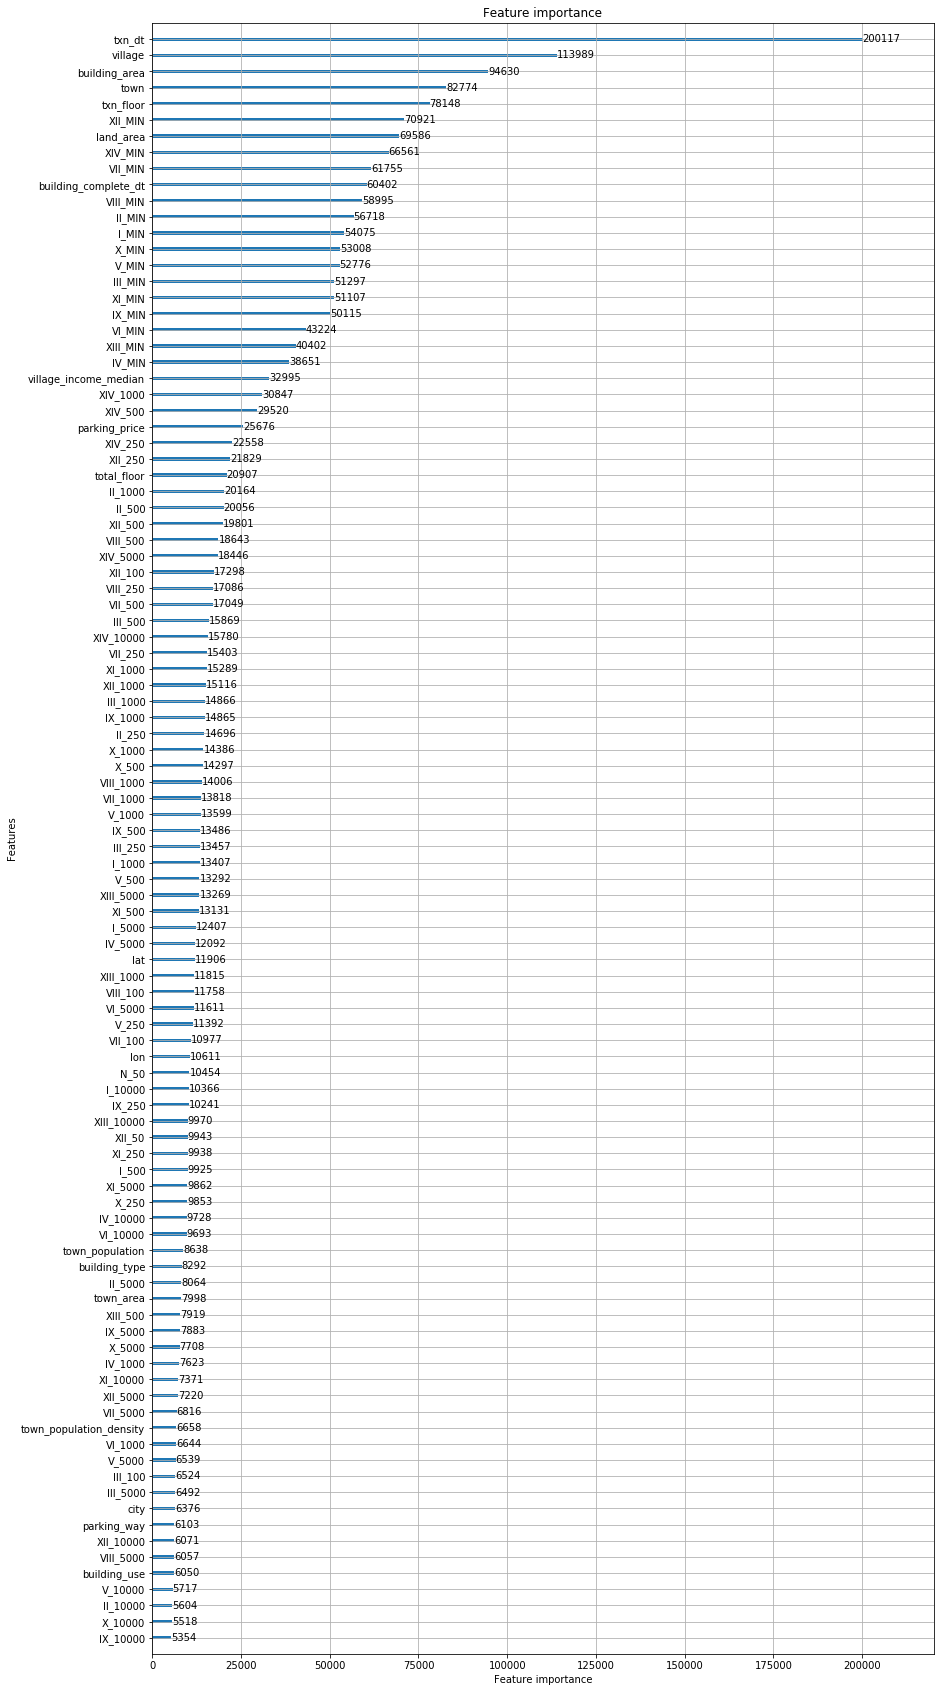

In [19]:
lgb.plot_importance(model, figsize=(14, 30), max_num_features=100)

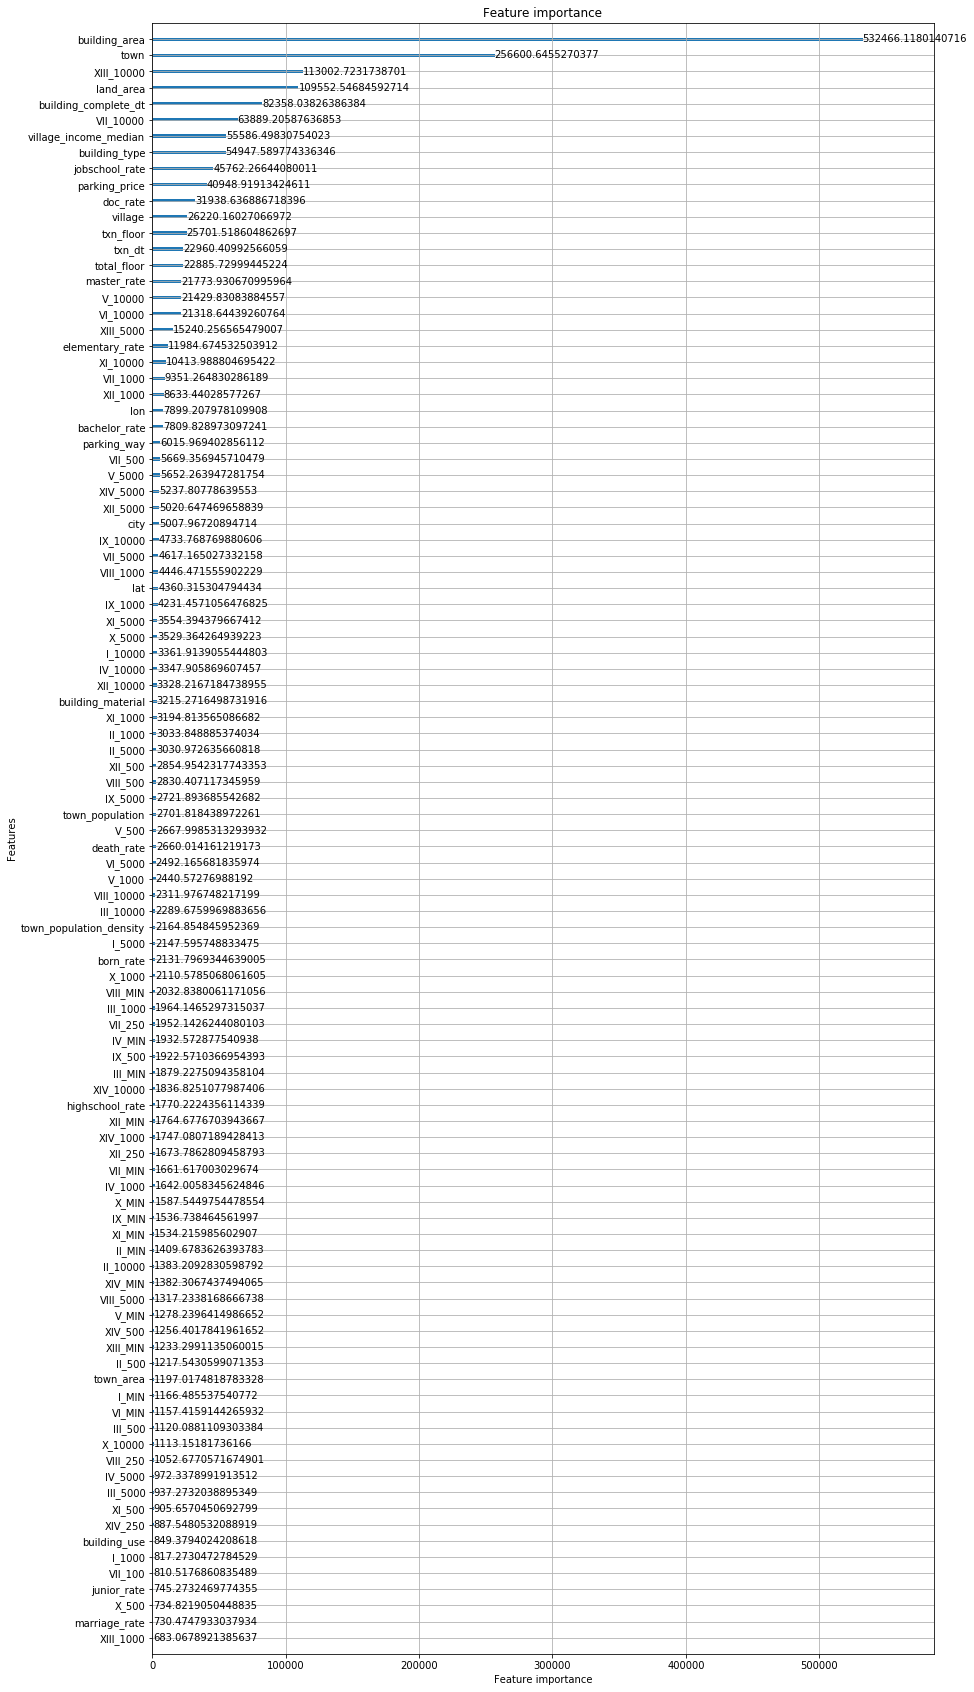

In [20]:
lgb.plot_importance(model, figsize=(14, 30), max_num_features=100, importance_type='gain')

In [22]:
df['dt'] = df['txn_dt'] - df['building_complete_dt']

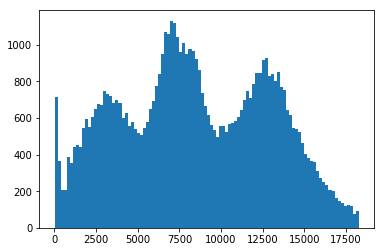

In [23]:
plt.hist(df['dt'], bins=100); plt.show()